In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [80]:
#######Question1 #######
create_df = pd.read_csv("house_data.csv")
create_df.fillna(create_df.mean(), inplace=True)
create_df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [81]:
create_df_new = create_df.drop(['Unnamed: 0', 'id'],axis=1)
create_df_new.describe()
#create_df_new.columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [82]:
create_df_new.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [83]:
create_df_new.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [84]:
#create_df_new.groupby(['floors']).count()

In [85]:
 create_df_new['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


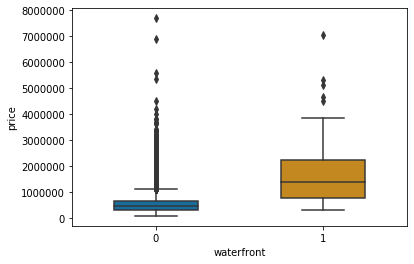

In [86]:
bplot=sns.boxplot(y='price', x='waterfront', 
                 data=create_df_new, 
                 width=0.5,
                 palette="colorblind")

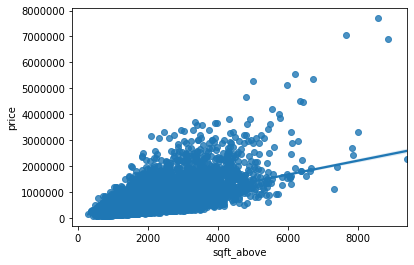

In [87]:
sns.regplot(create_df_new['sqft_above'], create_df_new['price'], truncate = True)

In [88]:
# create X and y
feature_cols = ['sqft_living']
X = create_df_new[feature_cols]
y = create_df_new['price']

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-43580.74309447361
[280.6235679]


In [89]:
print(f'r_sqr value: {lm2.score(X, y)}')

r_sqr value: 0.49285321790379316


In [72]:
####### Question 7 #######
#######Fit a linear regression model to predict the 'price' using the list of features:#########

list_x = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

X = create_df_new[list_x ]
y = create_df_new['price']
lm = LinearRegression()
lm.fit(X, y)

print(f'r_sqr value: {lm.score(X, y)}')

r_sqr value: 0.6576951666037494


In [73]:
####### Question 8 #######
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [74]:
Input  = [('Scale',StandardScaler()),('polynomial',PolynomialFeatures(degree =  2)),('mode',LinearRegression())]

In [75]:
pipe  =  Pipeline(Input)
pipe.fit(X,y)
pipe.score(X,y)

0.7513364395906755

In [76]:
####### Question 9 #######
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",
           "sqft_living15","sqft_above","grade","sqft_living"]    
X = create_df_new[features ]
y = create_df_new['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

Rig = Ridge(alpha=0.1)
Rig.fit(x_train,y_train)
Rig.score(x_test,y_test)

0.6478759163939115

In [77]:
####### Question 10 #######

PF=PolynomialFeatures(degree=2)
x_train_PF=PF.fit_transform(x_train[features])
x_test_PF=PF.fit_transform(x_test[features])

Rig_new = Ridge(alpha=0.1) 
Rig_new.fit(x_train_PF, y_train)
Rig_new.score(x_test_PF, y_test)

0.7002744260973095